In [34]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from amb_scripts.load_saved_info import *
from amb_scripts.plot_csfv3 import *

from dag_prf_utils.prfpy_functions import *
from dag_prf_utils.plot_functions import *
from dag_prf_utils.utils import *
from dag_prf_utils.mesh_maker import *
from dag_prf_utils.blender_tools import *
plot_cols = get_plot_cols()

fs_dir = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/freesurfer'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# LOAD PRF MULTI OBJECTS

In [35]:
sub = 'sub-02'
ses_list = ['ses-1', 'ses-2']
roi_fit = 'all'
fit_stage='iter'

model_list = ['gauss', 'csf']

prf_obj_list = [] 
prf_id_list = []
for i_ses,ses in enumerate(ses_list):        
    for eye in ['L', 'R']:    
        for model in model_list:
            if 'csf' in model:
                task = f'CSF{eye}E'
            else:
                task = f'pRF{eye}E'

            this_prf_data = amb_load_prf_params(
                sub=sub,
                task_list=task,
                model_list=model,
                roi_fit=roi_fit, 
                fit_stage=fit_stage,
                ses=ses
            )[task][model]
                                                    
            prf_obj_list.append(Prf1T1M(this_prf_data, model))
            prf_id_list.append(f'{eye}_{i_ses+1}_{model}')   
        
prf_multi = PrfMulti(prf_obj_list, prf_id_list)

KeyboardInterrupt: 

In [ ]:
rep_path = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep'

In [36]:
for eye in ['L', 'R']:
    for ses in ['1', '2']:
        this_mask = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].return_vx_mask({'min-rsq':.1})
        this_pol = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params['pol'].to_numpy()
        this_ecc = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params['ecc'].to_numpy()
        
        ply_file = dag_fs_to_ply(
            sub=sub, 
            data=this_pol, 
            fs_dir=fs_dir, 
            mesh_name='inflated',                   # Could be pial
            out_dir=rep_path,                       # Output (multiple .ply files)
            under_surf='curv',                      # What is going underneath the data (e.g., curvature)
            # *** OPTIONAL ***
            data_mask = this_mask,
            # data_alpha = data_alpha, 
            surf_name = f'{eye}{ses}-angle',
            cmap = 'twilight',
            vmin = -3.14, vmax=3.14,
            return_ply_file=True,
            )
        mlab_cmd = 'meshlab '
        for i in ply_file:
            mlab_cmd += i+' '
        os.system(mlab_cmd)

        ply_file = dag_fs_to_ply(
            sub=sub, 
            data=this_ecc, 
            fs_dir=fs_dir, 
            mesh_name='inflated',                   # Could be pial
            out_dir=rep_path,                       # Output (multiple .ply files)
            under_surf='curv',                      # What is going underneath the data (e.g., curvature)
            # *** OPTIONAL ***
            data_mask = this_mask,
            # data_alpha = data_alpha, 
            surf_name = f'{eye}{ses}-ecc',
            cmap = 'ecc',
            vmin = 0, vmax=5,
            return_ply_file=True,
            )
        mlab_cmd = 'meshlab '
        for i in ply_file:
            mlab_cmd += i+' '
        os.system(mlab_cmd)        


File to be named: sub-02_L1-angle_inflated
Writing: sub-02_L1-angle_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L1-angle_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L1-angle_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L1-angle_inflated.ply in 912 msec
LOG: 0 All files opened in 918 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L1-angle_inflated.ply in 739 msec
LOG: 0 All files opened in 748 msec
libpng warning: iCCP: known incorrect sRGB profile


File to be named: sub-02_L1-ecc_inflated
Writing: sub-02_L1-ecc_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L1-ecc_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L1-ecc_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L1-ecc_inflated.ply in 852 msec
LOG: 0 All files opened in 859 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L1-ecc_inflated.ply in 743 msec
LOG: 0 All files opened in 753 msec
libpng warning: iCCP: known incorrect sRGB profile


File to be named: sub-02_L2-angle_inflated
Writing: sub-02_L2-angle_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L2-angle_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L2-angle_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L2-angle_inflated.ply in 822 msec
LOG: 0 All files opened in 829 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L2-angle_inflated.ply in 740 msec
LOG: 0 All files opened in 749 msec


File to be named: sub-02_L2-ecc_inflated
Writing: sub-02_L2-ecc_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L2-ecc_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L2-ecc_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L2-ecc_inflated.ply in 889 msec
LOG: 0 All files opened in 895 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L2-ecc_inflated.ply in 738 msec
LOG: 0 All files opened in 746 msec
libpng warning: iCCP: known incorrect sRGB profile


File to be named: sub-02_R1-angle_inflated
Writing: sub-02_R1-angle_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R1-angle_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R1-angle_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R1-angle_inflated.ply in 835 msec
LOG: 0 All files opened in 842 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R1-angle_inflated.ply in 721 msec
LOG: 0 All files opened in 733 msec
libpng warning: iCCP: known incorrect sRGB profile


File to be named: sub-02_R1-ecc_inflated
Writing: sub-02_R1-ecc_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R1-ecc_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R1-ecc_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R1-ecc_inflated.ply in 886 msec
LOG: 0 All files opened in 892 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R1-ecc_inflated.ply in 858 msec
LOG: 0 All files opened in 867 msec
libpng warning: iCCP: known incorrect sRGB profile


File to be named: sub-02_R2-angle_inflated
Writing: sub-02_R2-angle_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R2-angle_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R2-angle_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R2-angle_inflated.ply in 798 msec
LOG: 0 All files opened in 805 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R2-angle_inflated.ply in 721 msec
LOG: 0 All files opened in 729 msec
libpng warning: iCCP: known incorrect sRGB profile


File to be named: sub-02_R2-ecc_inflated
Writing: sub-02_R2-ecc_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R2-ecc_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R2-ecc_inflated.asc as a surface
Using OpenGL 4.5


LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_R2-ecc_inflated.ply in 803 msec
LOG: 0 All files opened in 809 msec
LOG: 0 Opened mesh /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_R2-ecc_inflated.ply in 711 msec
LOG: 0 All files opened in 723 msec
libpng warning: iCCP: known incorrect sRGB profile


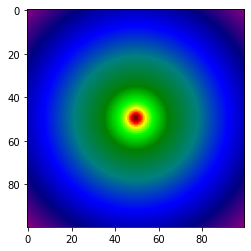

In [ ]:
x,y = np.meshgrid(
    np.linspace(-5,5,100),np.linspace(-5,5,100))
ecc,pol = dag_coord_convert(x,y,'cart2pol')
plt.imshow(
    np.flipud(pol), cmap='twilight',
)
plt.savefig(
    opj(rep_path, 'angle_colors.png')
)



cmap = dag_get_cmap('ecc')
plt.imshow(
    np.flipud(ecc), cmap=cmap,
)
plt.savefig(
    opj(rep_path, 'eccentricity_colors.png')
)


In [ ]:
bm = BlendMaker(
    sub=sub,
    fs_dir=fs_dir,
    out_dir=rep_path,
)

Already exists: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.pial.ply, and not overwriting
Already exists: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.pial.ply, and not overwriting
Already exists: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.inflated.ply, and not overwriting
Already exists: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.inflated.ply, and not overwriting
Already exists: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sphere.ply, and not overwriting
Already exists: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sphere.ply, and not overwriting
Already exists: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.curv_rgb.csv, and not overwriting
Already exists: /data1/projects/dumouli

Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.L-session-1-frequency_rgb.csv
Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.L-session-1-frequency_rgb.csv
Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.R-session-1-frequency_rgb.csv
Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.R-session-1-frequency_rgb.csv
Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.L-session-2-frequency_rgb.csv
Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.L-session-2-frequency_rgb.csv
Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.R-session-2-frequency_rgb.csv
Overwriting: /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyop

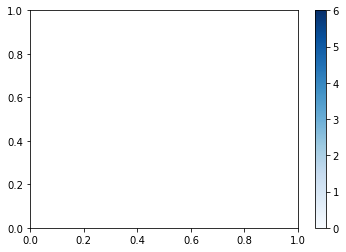

In [ ]:
for ses in ['1', '2']:        
    for eye in ['L', 'R']:    
        # g_mask = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].return_vx_mask({'min-rsq':.1})
        # g_pol = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params.pol.to_numpy()
        # g_ecc = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params.ecc.to_numpy()
        # bm.add_cmap(
        #     data=g_pol,
        #     surf_name=f'{eye}-session-{ses}-angle',
        #     data_mask=g_mask,
        #     # data_alpha=data_alpha,
        #     vmin = -3.14, vmax=3.14, # min and max values of polar anlge 
        #     cmap = 'pol',
        # )
        # bm.add_cmap(
        #     data=g_ecc,
        #     surf_name=f'{eye}-session-{ses}-eccentricity',
        #     data_mask=g_mask,
        #     # data_alpha=data_alpha,
        #     vmin = 0, vmax=5, # min and max values of polar anlge 
        #     cmap = 'ecc',
        # )                

        c_mask = prf_multi.prf_obj[f'{eye}_{ses}_csf'].return_vx_mask({'min-rsq':.1})
        c_sf0 = prf_multi.prf_obj[f'{eye}_{ses}_csf'].pd_params.sf0.to_numpy()
        bm.add_cmap(
            data=c_sf0,
            surf_name=f'{eye}-session-{ses}-frequency',
            data_mask=c_mask,
            # data_alpha=data_alpha,
            vmin = 0, vmax=6, # min and max values of polar anlge 
            cmap = 'Blues',
            ow=True,
        )           


In [ ]:
surf_list = ['L-session-1-frequency','R-session-1-frequency','L-session-2-frequency', 'R-session-2-frequency']
mesh_list = 'inflated'
for surf in surf_list:
    bm.blender_file_name = opj(rep_path, 'MZ-eye' + surf + '.blend')
    bm.launch_blender(
        surf_list=surf,
        mesh_list=mesh_list,
        save_blender=True,
        close_blender=True,
    )

Read prefs: /home/daghlian/.config/blender/3.5/config/userpref.blend

Successfully imported '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.inflated.ply' in 3.427 sec

Successfully imported '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.inflated.ply' in 3.512 sec
loading
lh.L-session-1-frequency_rgb.csv
loading
rh.L-session-1-frequency_rgb.csv
Info: Total files 0 | Changed 0 | Failed 0
Info: Saved "MZ-eyeL-session-1-frequency.blend"
Saved session recovery to '/tmp/quit.blend'

Blender quit
Read prefs: /home/daghlian/.config/blender/3.5/config/userpref.blend

Successfully imported '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.inflated.ply' in 3.479 sec

Successfully imported '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.inflated.ply' in 3.455 sec
loading
lh.R-session-1-frequency_rgb.csv
loading
rh.R-session-1-frequen